In [22]:
import numpy as np
data = np.load("mds-population.npz")
print(data['D']) # Distance matrix
print(data['population_list']) # List of populations

[[  0.  87.  12. ... 462. 559. 553.]
 [ 87.   0.  87. ... 210. 359. 285.]
 [ 12.  87.   0. ... 317. 401. 377.]
 ...
 [462. 210. 317. ...   0. 226. 173.]
 [559. 359. 401. ... 226.   0. 127.]
 [553. 285. 377. ... 173. 127.   0.]]
[b'Bantu' b'E. Afncan' b'Nilo-Saharan' b'W. African' b'San' b'Barter'
 b'Mbuti' b'Indian' b'Iranian' b'Near Eastern' b'Uralic' b'Ainu'
 b'Japanese' b'Korean' b'Mon Khmer' b'Thai' b'Dravidian' b'Mongol Tungus'
 b'Tibetan' b'Indonesian' b'Malaysian' b'Filipino' b'N. Turkic'
 b'S. Chinese' b'Basque' b'Lapp' b'Sardinian' b'Danish' b'English'
 b'Greek' b'Italian' b'C Amerind' b'Eskimo' b'Na-Dene' b'N. American'
 b'S. American' b'Chukchi' b'Melanesian' b'Micronesian' b'Polynesian'
 b'New Guinean' b'Australian']


In [23]:
# question 4a: 
# ask TA to help with items in this item
# What do we means by asumptions/lost information? 3D plot harder to visualize

# find error for p dimensions to answer letter b

# i: 2D MDS on the distance matrix D implies we can fit all distances perfectly in a 2D plane. It also implies there is no way of knowing the data's original rotation, mirror and translation
# ii: A good quality measure for each number of dimensions being considered in an MDS can be infered from the principal components of the original distance matrix D. Choose a number of dimensions for MDS that essentially allows it to capture the most amount of variance from the original matrix D. In our implementation, the number of dimensions was probably 5 or 6.
# iii: just plot points with each individual label on them

C:\Users\Sung\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


-1034.8310840156685 -1305.0225514651052


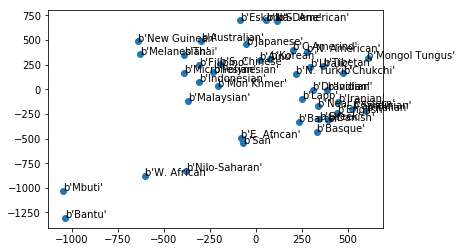

In [24]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

embedding = MDS(n_components=2)
data_vectorial = embedding.fit_transform(data["D"])

plt.scatter(data_vectorial[:,0], data_vectorial[:,1])

print(data_vectorial[0,0],data_vectorial[0,1])

for i in range(len(data['population_list'])):
    plt.annotate(data['population_list'][i], (int(data_vectorial[i,0]),int(data_vectorial[i,1])))

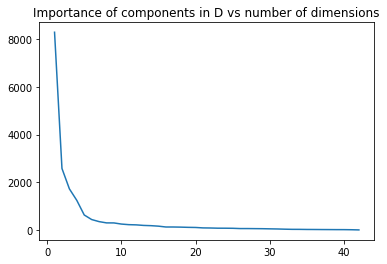

In [25]:
# errors_mds = [0 for i in range(20)]

# for i in range(20):
#     embedding_tmp = MDS(n_components=i+1)
#     data_vectorial_tmp = embedding_tmp.fit_transform(data["D"])
# #     print(MDS_error(data['D'], data_vectorial_tmp))
#     errors_mds[i] = MDS_error(data['D'], data_vectorial_tmp)

# plt.plot([i+1 for i in range(20)], errors_mds)
plt.title("Importance of components in D vs number of dimensions")

from numpy import linalg

U,s,Vt = linalg.svd(data["D"])

plt.plot([i+1 for i in range(42)], s)

# print(MDS_error(data['D'], data_vectorial))

[0 2 0 0 2 2 0 2 2 2 2 1 1 1 1 1 2 2 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1 1 1 1 2
 1 1 1 1 1]


Text(0.5,1,'K-means clustering (k=3)')

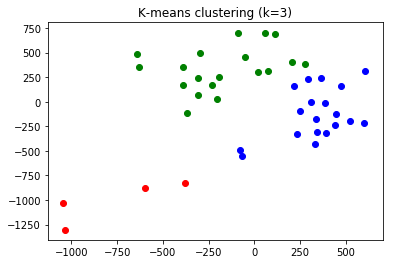

In [26]:
# question 4b kmeans clustering for transformed genetic data

# ask TA about doubts concerning the theoredical questions from this item
# svd on distance matrix, look at singular values. Serge tip

from sklearn.cluster import KMeans

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters).fit_predict(data_vectorial)

print(kmeans)

clusters = [[] for cluster in range(num_clusters)]
for idx in range(len(data_vectorial)):
    clusters[kmeans[idx]].append(data_vectorial[idx])

cluster1 = np.array(clusters[0])
cluster2 = np.array(clusters[1])
cluster3 = np.array(clusters[2])

colors = ["r", "g", "b"]

plt.scatter(cluster1[:,0], cluster1[:,1], color="r")
plt.scatter(cluster2[:,0], cluster2[:,1], color="g")
plt.scatter(cluster3[:,0], cluster3[:,1], color="b")
plt.title("K-means clustering (k=3)")
    

C:\Users\Sung\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


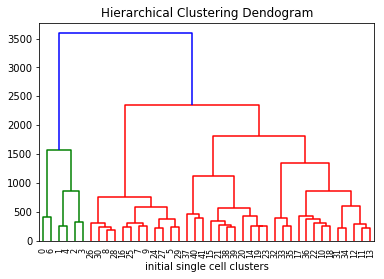

Text(0.5,1,'Hierarchical clustering scatter plot')

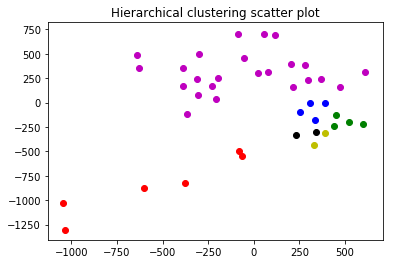

In [27]:
# question 4c: run hierarchical clustering and 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(data["D"], 'ward')
fig = plt.figure()
dn = dendrogram(Z)
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("initial single cell clusters")
plt.show()

data_cluster_assignments = fcluster(Z, 1.1526737)

num_h_clusters = 6

clusters = [[] for i in range(num_h_clusters)]

for i in range(len(data_cluster_assignments)):
    clusters[data_cluster_assignments[i]-1].append(data_vectorial[i])

# print(clusters)

cluster1 = np.array(clusters[0])
cluster2 = np.array(clusters[1])
cluster3 = np.array(clusters[2])
cluster4 = np.array(clusters[3])
cluster5 = np.array(clusters[4])
cluster6 = np.array(clusters[5])

colors = ["r", "g", "b","y","b","w"]

plt.scatter(cluster1[:,0], cluster1[:,1], color="r")
plt.scatter(cluster2[:,0], cluster2[:,1], color="g")
plt.scatter(cluster3[:,0], cluster3[:,1], color="b")
plt.scatter(cluster4[:,0], cluster4[:,1], color="y")
plt.scatter(cluster5[:,0], cluster5[:,1], color="k")
plt.scatter(cluster6[:,0], cluster6[:,1], color="m")
plt.title("Hierarchical clustering scatter plot")

# Hierarchical clustering has proven to be harder to set a cluster number k than previous kmeans method
# This algorithm, however is useful for researchers to find good values of k in an eventual implementation of kmeans clustering


Text(0.5,1,'K-medoids clustering visualization (k=3)')

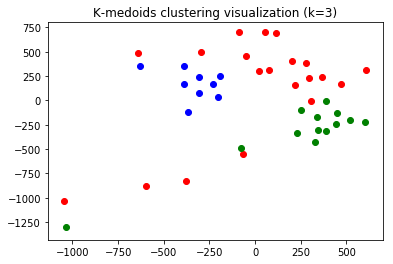

In [28]:
# question 4d: run k medoids algorithm, plot it and compare it to k-means

# ask TA for good kmedoids library

import kmedoids

M,C = kmedoids.kMedoids(data["D"], 3)

num_clusters = 3
clusters = [[] for cluster in range(num_clusters)]
for label in C:
    for point_idx in C[label]:
        clusters[label].append(data_vectorial[point_idx])

cluster1 = np.array(clusters[0])
cluster2 = np.array(clusters[1])
cluster3 = np.array(clusters[2])

colors = ["r", "g", "b"]

plt.scatter(cluster1[:,0], cluster1[:,1], color="r")
plt.scatter(cluster2[:,0], cluster2[:,1], color="g")
plt.scatter(cluster3[:,0], cluster3[:,1], color="b")
plt.title("K-medoids clustering visualization (k=3)")
        
# comparison of kmeans wih kmedoids:
# while kmeans clearly cluster clumps of data from vectorized samples,
# kmedoids is a way to cluster data together in a non vectirial format.
# some differences where noticed on the clustering structure of both approaches
# we attribute this to the difference in cluster strategies of both algorithms



# question for TA: why is it so different though?


# References

* https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy
* Bauckhage C. Numpy/scipy Recipes for Data Science: k-Medoids Clustering[R]. Technical Report, University of Bonn, 2015.
* https://github.com/letiantian/kmedoids
* https://stackoverflow.com/questions/20484195/typeerror-range-object-does-not-support-item-assignment
* https://github.com/letiantian/kmedoids/issues/4
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage